In [1]:
include("cutoff.jl")

hitting_times (generic function with 1 method)

3328/100000 paths did not converge to 0 within 30 steps.


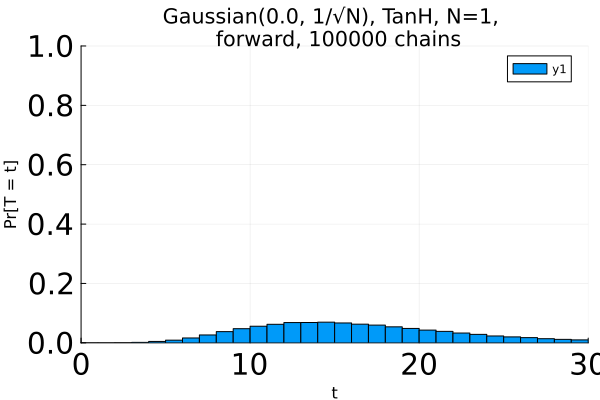

In [2]:
# for N = 1:12
N = 1
X₀ = rand(Uniform(-1, 1), N)
num_chains = 100000
#     Dist = Uniform(-1/√N, 1/√N)
Dist = Normal(0.0, 1)
# Dist = Normal(0.0, 1/√N)
# activation = σ
activation = tanh
step_size = 0.0001
num_steps = 30
forward = true
store_steps = false

Exp = Experiment(X₀, N, num_chains, Dist, activation, step_size, num_steps, forward, store_steps)
times = hitting_times(Exp)

diststr_greek, diststr_nongreek, actstr, dynamicsstr = get_plotting_strs(Exp)

bins = 0:1:num_steps
hist = normalize(fit(Histogram, times, bins), mode=:probability)
# histogram values can be obtained from hist.weights

p = plot(hist,
    title="$diststr_greek, $actstr, N=$N, \n $dynamicsstr, $num_chains chains",
    xlabel="t",
    ylabel="Pr[T = t]",
    fontsize=30,
    tickfontsize=20,
    xlim=(0, num_steps),
    ylim=(0, 1),
)
display(p)
# savefig(p, "imgs/hitting_times/hitting_times $diststr_nongreek $actstr $dynamicsstr N=$N.png")
# end

In [58]:
hist.weights

30-element Vector{Float64}:
 0.0
 0.0002458109713630218
 0.001546560694825679
 0.005233725265271006
 0.012987012987012986
 0.022573640870170837
 0.03589864394280798
 0.04711376951124585
 0.05652628128968823
 0.06669671022983326
 0.07092670736203859
 0.07242205743783031
 0.07240157319021673
 ⋮
 0.04201319185546315
 0.03811094268507518
 0.030695645048957353
 0.026137899954934655
 0.023515916260395755
 0.01859969683313532
 0.015875291900528492
 0.012608054406161662
 0.01081568273997296
 0.008521447007251423
 0.006913433569584989
 0.005786799950837806

In [ ]:
function pr(N, S, T)
    """
    """
    if T == 1
        return (1/2)^N
    end
    return (1/2)^N * S * pr(N, S, T-1)
end


In [ ]:
S = 0

for i = 1:N
    S += binomial(N, i)
end

for T=1:7
    println(pr(N, S, T))
end

In [ ]:
S^1 * (1/2)^(2 * N)

In [ ]:
N = 4
S = 0

for i = 1:N
    S += (binomial(N, i))^2
end

In [ ]:
S * (1/2)^(3 * N)

In [ ]:
S

In [ ]:
if !false
    println("s")
end

In [ ]:
s = rand(Dist, 3, 3)

In [ ]:
rand!(Dist, s)

In [3]:
168/100000

0.00168

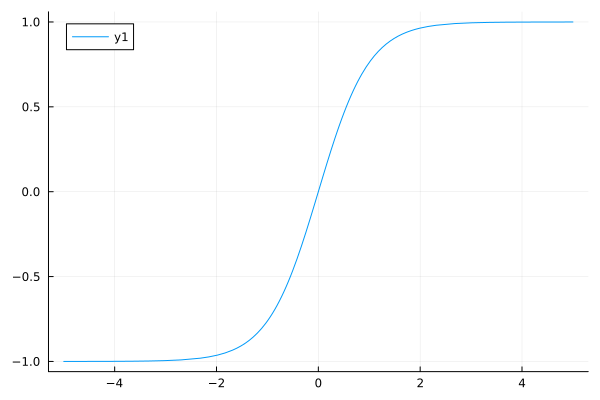

In [17]:
plot(tanh)

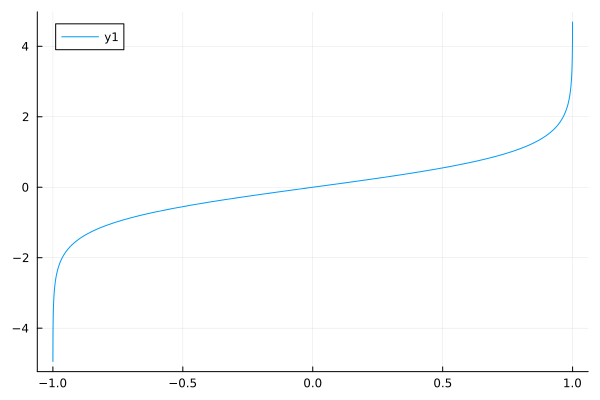

In [20]:
plot(atanh)

In [91]:
e = 0.0001
succs = 0
num_trials = 100000
N = 4

for i = 1:num_trials
    ws = rand(Normal(0.0, 1), N)
    xs = rand(Uniform(-1, 1), N)

    s = dot(ws,xs)
    
    if -e <= tanh.(s) <= e
        succs += 1
    end
end
succs/num_trials

7.0e-5

In [76]:
ws = rand(Normal(0.0, 1), N)
xs = rand(Uniform(-1, 1), N)

s = dot(ws,xs)

-1.3481606953484397

0.4678580396677585

0.289718182471775

In [ ]:
s